In [35]:
import pandas as pd
import matplotlib.pyplot as py
import numpy as np
import seaborn as sns

In [36]:
df=pd.read_csv('IBM Attrition Data.csv')

In [37]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


### Find the age distribution of employees in IBM

In [38]:
df['Age'].value_counts()

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

<AxesSubplot:ylabel='Frequency'>

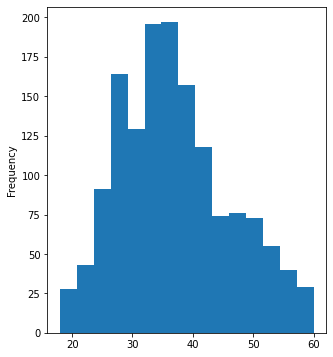

In [39]:
py.figure(figsize=(5,6))
df['Age'].plot.hist(bins=15)

### Explore attrition by age

<AxesSubplot:xlabel='Age', ylabel='count'>

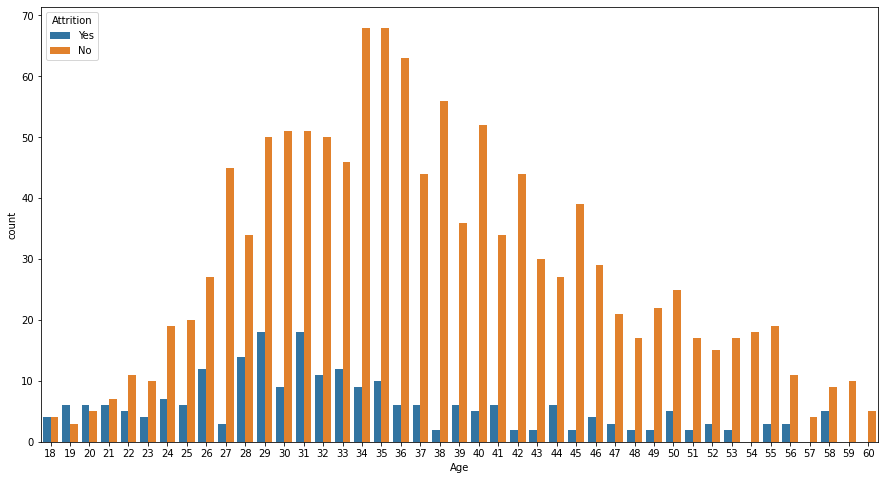

In [40]:
py.figure(figsize=(15,8))
sns.countplot(data=df,x='Age',hue='Attrition')

### Explore data for Left employees

Text(0.5, 1.0, 'Attrition breakdown ')

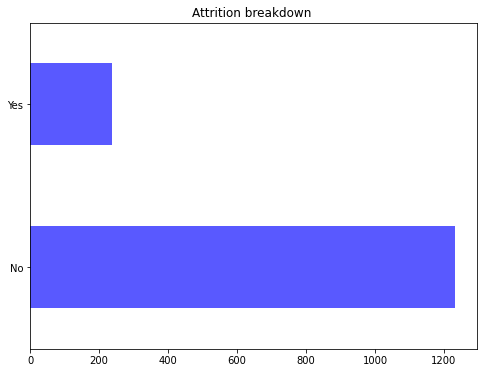

In [82]:
py.figure(figsize=(8,6))
df.Attrition.value_counts().plot(kind='barh',color='blue',alpha=.65)
py.title("Attrition breakdown ")

### Find out the distribution of employees by the education field

In [41]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [42]:
df.dtypes

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

In [43]:
df1=df.copy()

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [45]:
for col in df.columns:
    if df1[col].dtypes=='object':
        df1[col]=le.fit_transform(df1[col])

In [46]:
df1['EducationField'].value_counts()

1    606
3    464
2    159
5    132
4     82
0     27
Name: EducationField, dtype: int64

In [65]:
py.hist(list(df['EducationField'].value_counts(),bins=12)

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_11472/45886924.py, line 1)

<AxesSubplot:ylabel='Frequency'>

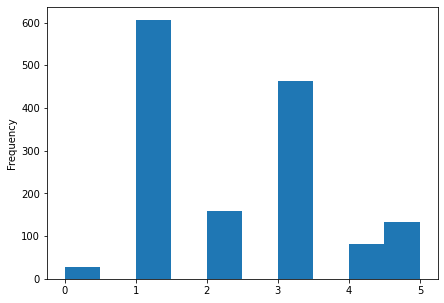

In [48]:
py.figure(figsize=(7,5))
df1['EducationField'].plot.hist(bins=10)

### Give a bar chart for the number of married and unmarried employees

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

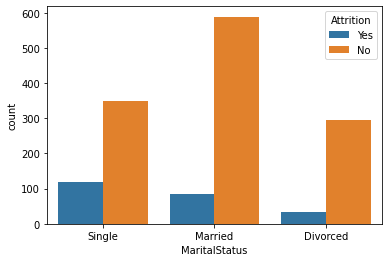

In [50]:
sns.countplot(x='MaritalStatus',hue='Attrition',data=df)

<BarContainer object of 3 artists>

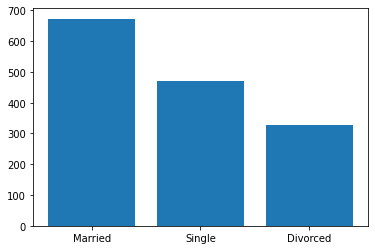

In [66]:
py.bar(list(df['MaritalStatus'].value_counts().keys()),list(df['MaritalStatus'].value_counts()))

### Build up a logistic regression model to predict which employees are likely to attrite.

In [67]:
df1.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,1,2,2,4,4,3,2,2090,6,3,0
3,33,0,1,3,4,1,4,3,1,2909,1,3,8
4,27,0,1,2,1,3,1,2,1,3468,9,3,2


In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1.iloc[:,[0,9]]=sc.fit_transform(df1.iloc[:,[0,9]])
df1.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,0.446350,1,2,1,2,1,2,4,2,-0.108350,8,1,6
1,1.322365,0,1,8,1,1,3,2,1,-0.291719,1,3,10
2,0.008343,1,1,2,2,4,4,3,2,-0.937654,6,3,0
3,-0.429664,0,1,3,4,1,4,3,1,-0.763634,1,3,8
4,-1.086676,0,1,2,1,3,1,2,1,-0.644858,9,3,2


In [69]:
x=df1.drop('Attrition',axis=1)
y=df1['Attrition']

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [74]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=42)

In [75]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [76]:
y_pred=lr.predict(x_test)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.94       320
           1       0.75      0.12      0.21        48

    accuracy                           0.88       368
   macro avg       0.82      0.56      0.57       368
weighted avg       0.87      0.88      0.84       368

